<a href="https://colab.research.google.com/github/Jade-P/MLGroupProject/blob/Neutral--Jade/Happy_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check current directory

In [ ]:
pwd

'/content'

Change directory

In [ ]:
%cd '/content/drive/MyDrive/ECS171/emotionDataSet'

/content/drive/.shortcut-targets-by-id/1Z5iKjOa4METq6Gspzm97KWYkNG2sG5Wo/ECS171/emotionDataSet


In [ ]:
pwd

'/content'

##**Loading Data** 

Import libraries

In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [ ]:
TRAIN_DIR = ('Training/Training/')
TEST_DIR = ('Testing/Testing/')

In [ ]:
emotions = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

In [ ]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(emotions)):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    print(img.shape)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
IMG_SIZE= (48, 48)

In [ ]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)


  0%|          | 0/6 [00:26<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [ ]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|██████████| 6/6 [03:03<00:00, 30.65s/it]

7137 images loaded from Testing/Testing/ directory.


##**Sampling data**

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

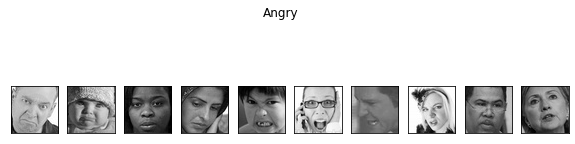

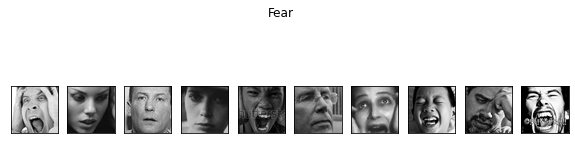

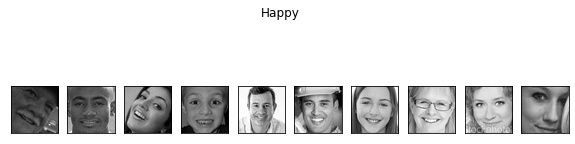

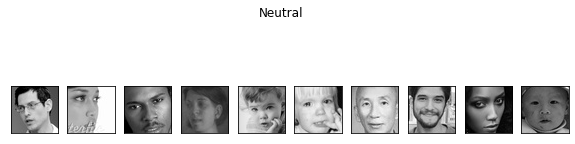

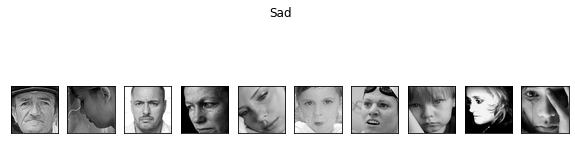

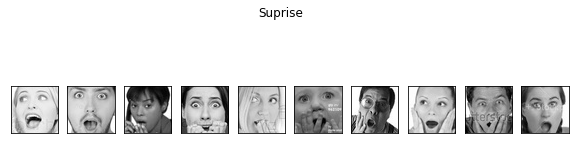

In [ ]:
plot_samples(X_train, y_train, train_labels, 10)

##**Counting data for each class**

In [ ]:
import pandas as pd

_, train_count = np.unique(y_train,return_counts=True)
_, test_count = np.unique(y_test,return_counts=True)

df = pd.DataFrame(data = (train_count,test_count))
df = df.T
df['Name'] = emotions
data = df.rename(columns={0: "train", 1: "test", "Name" : "emotion"})
data

,train,test,emotion
0,4065,978,Angry
1,4127,1034,Fear
2,7235,1774,Happy
3,5255,1273,Neutral
4,4870,1247,Sad
5,3191,831,Suprise


Pie chart representation

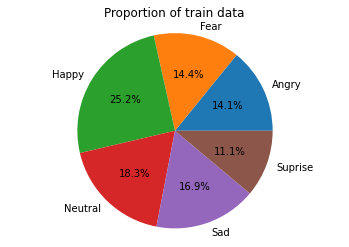

In [ ]:
plt.pie(train_count,
       explode=(0,0,0,0,0,0),
       labels=emotions,
       autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of train data")
plt.show()

Bar chart representation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



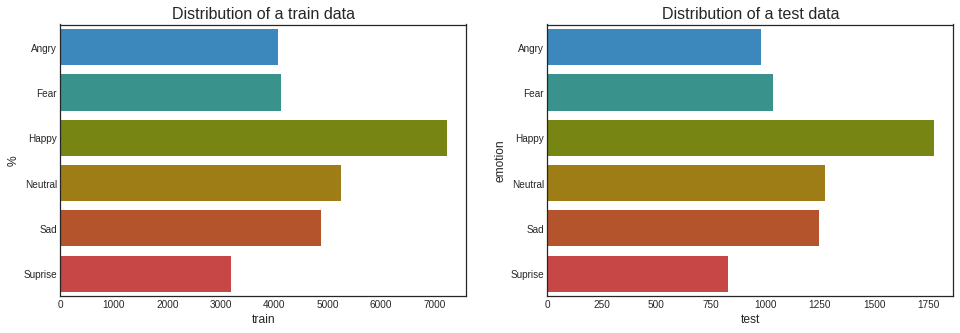

In [ ]:
import seaborn as sns

plt.style.use('seaborn-white')
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.barplot(data["train"], data["emotion"], ax=ax[0])
ax[0].set_title("Distribution of a train data"), ax[0].set_ylabel("%")
sns.barplot(data["test"], data["emotion"], ax=ax[1])
ax[1].set_title("Distribution of a test data"), ax[0].set_ylabel("%")
plt.show()

In [ ]:
Happy_count = df[df['Name'] == 'Happy'][0]

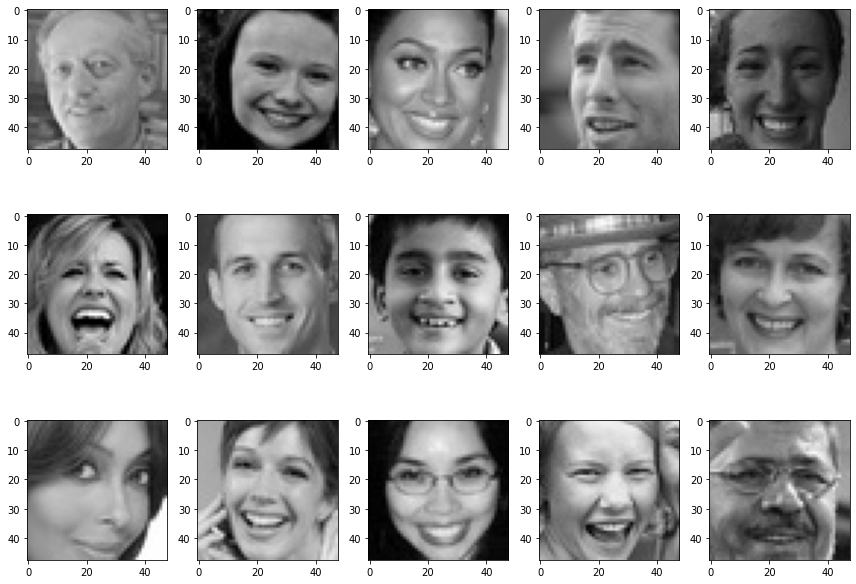

In [ ]:
pic_size = 48

plt.figure(0, figsize=(12,20))
cpt = 0
np.random.seed(42)

random_img = np.random.randint(0, Happy_count, size=15)

for i in random_img:
    cpt += 1
    plt.subplot(7,5,cpt)
    img = cv2.imread('Training/Training/'+'Happy'+"/"+os.listdir("Training/Training/"+'Happy')[i])
    img = img.astype('float32') / 255
    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
    plt.imshow(resized,cmap="gray")
    pass

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  

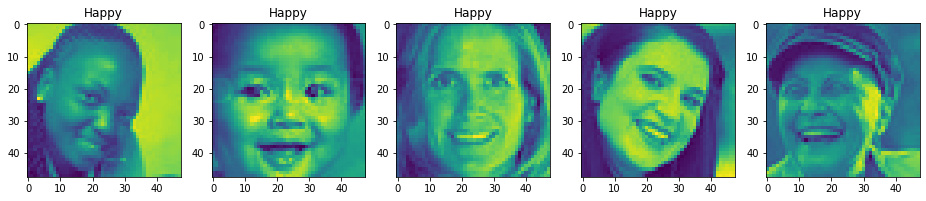

In [ ]:
Happy_DIR = TRAIN_DIR + "/Happy/"
Happy_imgs = [Happy_DIR + path for path in os.listdir(Happy_DIR)]

fig, axes = plt.subplots(1,5, figsize=(16,16))
for ax in axes.reshape(-1):
    img_path = np.random.choice(Happy_imgs)
    img = Image.open(img_path)
    img.thumbnail((300,300))
    ax.imshow(img), ax.set_title("Happy")
plt.show()

##**Finding duplicates**

In [ ]:
image_list = []

path = TRAIN_DIR + '/Happy'

for f in os.listdir(path):
  image_list.append(f)

img_size = list(map(lambda x: os.path.getsize(path + '/' + x), image_list))

# Find Same Photos
img_data = pd.DataFrame({'filename':image_list, 'size':img_size})

print('number of images :', len(img_data))

number of images : 7235


In [ ]:
img_data

,filename,size
0,Happy-961.jpg,1297
1,Happy-6746.jpg,1460
2,Happy-6855.jpg,1558
3,Happy-6200.jpg,1417
4,Happy-6514.jpg,1538
...,...,...
7230,Happy-1573.jpg,1637
7231,Happy-2209.jpg,1572
7232,Happy-167.jpg,1620
7233,Happy-137.jpg,1509


In [ ]:
# Photo Value Counts
filename_cnts = pd.DataFrame({'filename':img_data['filename'].value_counts().index, 'fn_counts':img_data['filename'].value_counts().values})   
imgsize_cnts = pd.DataFrame({'size':img_data['size'].value_counts().index, 'size_counts':img_data['size'].value_counts().values})   

img_data = pd.merge(img_data, filename_cnts, how = 'left', on = 'filename')
img_data = pd.merge(img_data, imgsize_cnts, how = 'left', on = 'size')

img_data.sample(2)

,filename,size,fn_counts,size_counts
3851,Happy-5436.jpg,1457,1,17
3721,Happy-6073.jpg,1668,1,19


In [ ]:
SimilarSizeData = imgsize_cnts[imgsize_cnts['size_counts'] > 1]

In [ ]:
def CompareImage(imageA, imageB):

    # Grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    
    # Check Image structure
    if len(grayA)==len(grayB):
        (score, diff) = structural_similarity(grayA, grayB, full=True)

    return score

In [ ]:
import cv2  
from skimage.metrics import structural_similarity

delete = []
similar = []

for i in range(len(SimilarSizeData)):

    temp = img_data[img_data['size']==SimilarSizeData['size'][i]].reset_index(drop = True).sort_values(['filename'])

    candidates = []

    for j in range(len(temp) - 1):
      for k in range(j+1, len(temp)):
        filenameA = temp['filename'][j]
        filenameB = temp['filename'][k]
        
        imageA = cv2.imread(path+'/'+filenameA)
        imageB = cv2.imread(path+'/'+filenameB)

        score = CompareImage(imageA, imageB)
        if (score == 1):
          delete.append([filenameA, filenameB])
        elif (score > 0.5):
          similar.append([filenameA, filenameB])
          print("score: " + str(score))

score: 0.507220860919935
score: 0.507220860919935
score: 0.5461958331723261
score: 0.5316829843490676
score: 0.5316829843490676
score: 0.5190429726335152
score: 0.5356492046874829
score: 0.7168389603349193


In [ ]:
print(str(len(delete)) + " same image pairs found")
print(str(len(similar)) + " similar image pairs found")

157 same image pairs found
8 similar image pairs found


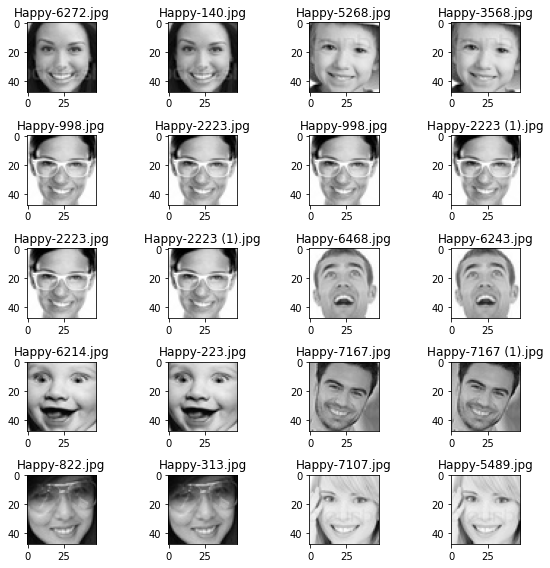

In [ ]:
pic_size = 48

plt.figure(0, figsize=(8,8))
cpt = 0

for i in range(len(delete[:10])):
  for filename in delete[i]:
    cpt += 1
    ax = plt.subplot(5,4,cpt)
    ax.set_title(filename)

    img = cv2.imread(path+"/"+ filename)
    plt.imshow(img,cmap="gray")
    pass

plt.tight_layout()
plt.show()

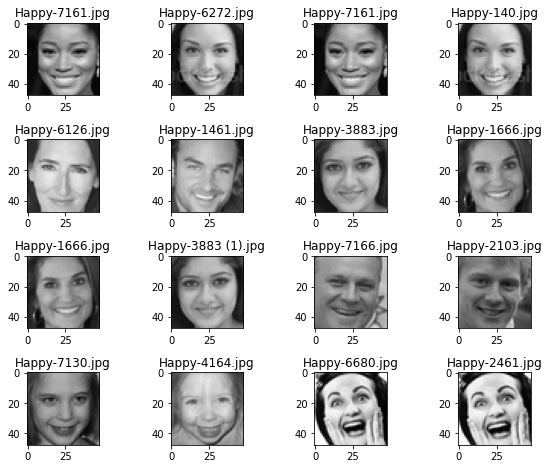

In [ ]:
pic_size = 48

plt.figure(0, figsize=(8,8))
cpt = 0

for i in range(len(similar)):
  for filename in similar[i]:
    cpt += 1
    ax = plt.subplot(5,4,cpt)
    ax.set_title(filename)

    img = cv2.imread(path+"/"+ filename)
    plt.imshow(img,cmap="gray")
    pass

plt.tight_layout()
plt.show()

##**Sizes distribution**

In [ ]:
path = 'Training/Training/Happy'

In [ ]:
widths = dict()
heights = dict()

for img in os.listdir(path):
  img = cv2.imread(path + '/' + img)
  width, height, _ = img.shape
  widths[width] = widths.get(width,0)+1
  heights[height] = widths.get(height,0)+1

In [ ]:
print(widths)
print(heights)

{48: 7235}
{48: 7236}
